# Students Performance in Exames
#### Marks secured by the students in various subjects



## Inspiration
#### To understand the influence of various factors like economic, personal and social on the students performance

Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
%matplotlib inline

Reading the data from the file

In [2]:
df = pd.read_csv("../Datasets/StudentsPerformance/StudentsPerformance.csv")

Let us look at the data

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset size

In [4]:
df.shape

(1000, 8)

Let's remove spaces from columns names

In [5]:
df.columns = df.columns.str.replace(" ", "_")

Some information on the data

In [6]:
df.describe(include="all")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


Checking if there are some null values

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Text(0.5, 0.98, 'Distribution of exam scores')

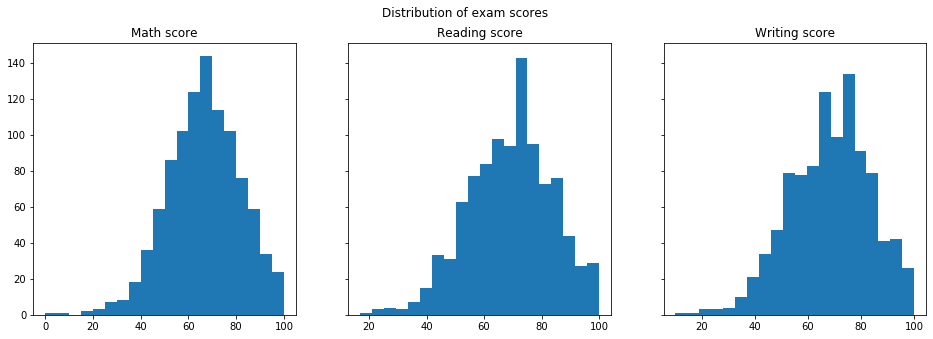

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
axs[0].hist(df["math_score"], bins=20)
axs[0].set_title("Math score")
axs[1].hist(df["reading_score"], bins=20)
axs[1].set_title("Reading score")
axs[2].hist(df["writing_score"], bins=20)
axs[2].set_title("Writing score")
fig.suptitle("Distribution of exam scores")

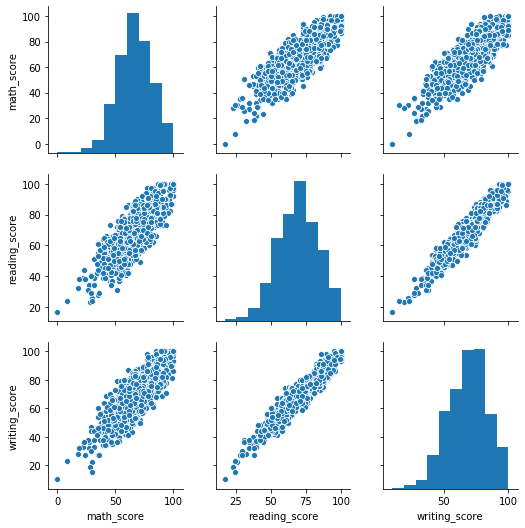

In [9]:
sns.pairplot(df)

As we can see, most of the scores seem correlated, but score for writing and reading seem to present the biggest correlation.<br>
Let us check this.

In [10]:
df.corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


This results support our previous theory with the biggest correlation scores between reading and writing.

Let us check the distribution in the categorical features.

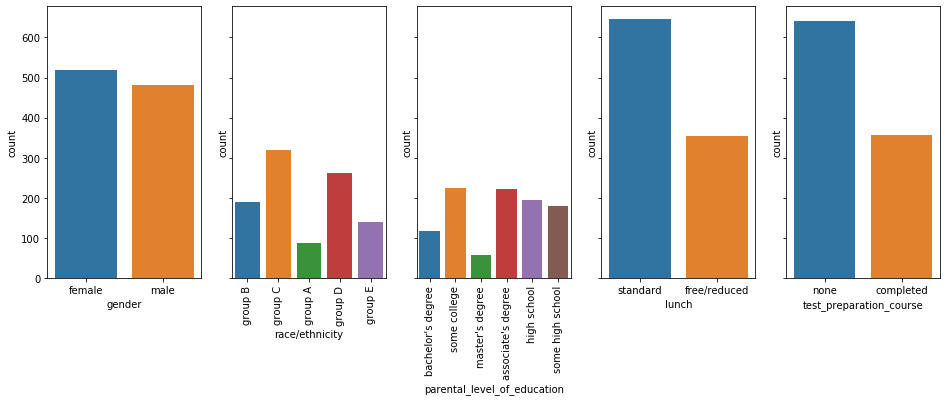

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(16, 5), sharey=True)
sns.countplot(df.gender, ax = axs[0])
ax0 = sns.countplot(df["race/ethnicity"], ax = axs[1])
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
ax1 = sns.countplot(df["parental_level_of_education"], ax = axs[2])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.countplot(df.lunch, ax = axs[3])
sns.countplot(df["test_preparation_course"], ax = axs[4])

Let us see if there is some statistically significantly difference between these groups using 95% confident interval and the null hypothesis being that there is no difference between the groups when comparing scores.

### Gender

In [12]:
mod = ols("math_score ~ gender", data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print()
print("Math Scores")
print(aov_table)

mod = ols("reading_score ~ gender", data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print()
print("Reading Scores")
print(aov_table)

mod = ols("writing_score ~ gender", data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print()
print("Writing Scores")
print(aov_table)


Math Scores
                 sum_sq     df          F        PR(>F)
gender      6481.373854    1.0  28.979336  9.120186e-08
Residual  223207.705146  998.0        NaN           NaN

Reading Scores
                 sum_sq     df          F        PR(>F)
gender     12710.843676    1.0  63.350584  4.680539e-15
Residual  200241.595324  998.0        NaN           NaN

Writing Scores
                 sum_sq     df          F        PR(>F)
gender     20930.822413    1.0  99.591576  2.019878e-22
Residual  209746.261587  998.0        NaN           NaN


As we can see, in the case of gender, the null hypothesis should be rejected in all the exams and, as such, there is a statistically significantly difference between the groups for all of them

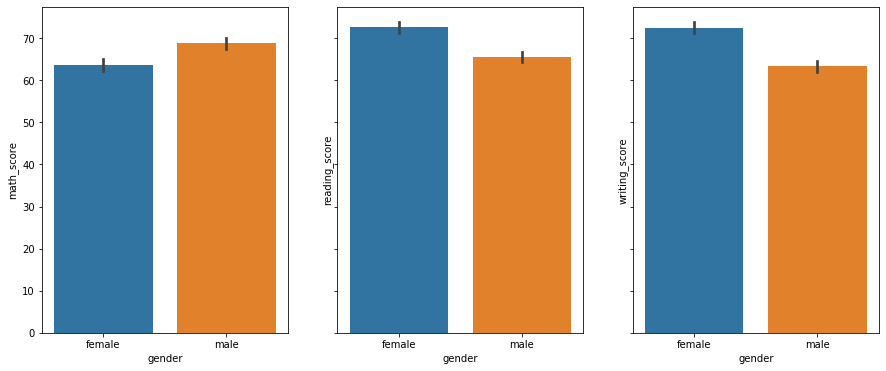

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
sns.barplot(x='gender',y='math_score',data=df, ax=axs[0])
sns.barplot(x='gender',y='reading_score',data=df, ax=axs[1])
sns.barplot(x='gender',y='writing_score',data=df, ax=axs[2])

As we can see there is a difference in scores when separating the students in female and male. In the math exame, the male students performed better, but in both reading and writing exams it was the female students that out-performed the other students.

#### Race/ethnicity

In [14]:
mc = MultiComparison(df['math_score'], df['race/ethnicity'])
mc_results = mc.tukeyhsd()
print()
print("Math Scores")
print(mc_results)
mr = MultiComparison(df['reading_score'], df['race/ethnicity'])
mr_results = mr.tukeyhsd()
print()
print("Reading Scores")
print(mr_results)
mw = MultiComparison(df['writing_score'], df['race/ethnicity'])
mw_results = mw.tukeyhsd()
print()
print("Writing Scores")
print(mw_results)


Math Scores
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
group A group B   1.8234 0.8597   -3.36  7.0068  False
group A group C   2.8347 0.4966 -2.0028  7.6723  False
group A group D   5.7334 0.0138  0.7824 10.6844   True
group A group E  12.1922  0.001  6.7215 17.6629   True
group B group C   1.0113    0.9 -2.6867  4.7094  False
group B group D     3.91 0.0441  0.0647  7.7552   True
group B group E  10.3688  0.001  5.8741 14.8635   True
group C group D   2.8986 0.1287 -0.4659  6.2632  False
group C group E   9.3575  0.001  5.2665 13.4485   True
group D group E   6.4588  0.001  2.2343 10.6834   True
------------------------------------------------------

Reading Scores
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
group A group B   2.6785 0.5875 -2.3

As we can see there are some rejections of the hull hypothesis. Mainly envolving group D and E, with the biggest meandiff between groups being between group A and group E.

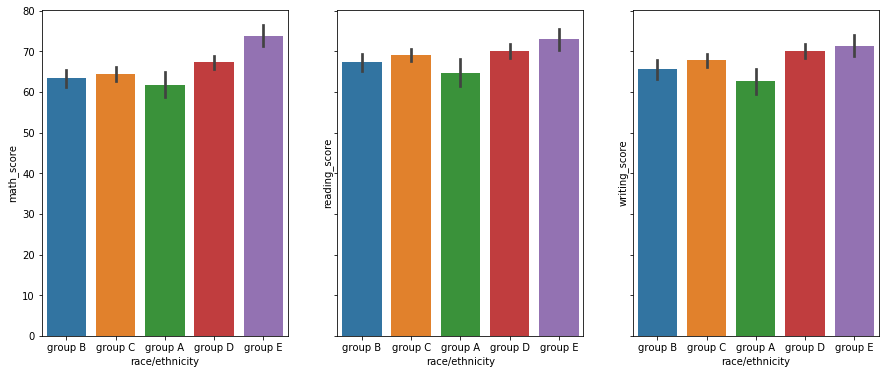

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
sns.barplot(x='race/ethnicity',y='math_score',data=df, ax=axs[0])
sns.barplot(x='race/ethnicity',y='reading_score',data=df, ax=axs[1])
sns.barplot(x='race/ethnicity',y='writing_score',data=df, ax=axs[2])

This difference can also be seen in the barplot with the difference between group A and E being significant across the board.

#### Parental level of education

In [16]:
mc = MultiComparison(df['math_score'], df['parental_level_of_education'])
mc_results = mc.tukeyhsd()
print()
print("Math Scores")
print(mc_results)
mr = MultiComparison(df['reading_score'], df['parental_level_of_education'])
mr_results = mr.tukeyhsd()
print()
print("Reading Scores")
print(mr_results)
mw = MultiComparison(df['writing_score'], df['parental_level_of_education'])
mw_results = mw.tukeyhsd()
print()
print("Writing Scores")
print(mw_results)


Math Scores
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree   1.5069    0.9  -3.3586  6.3725  False
associate's degree       high school  -5.7451 0.0013  -9.9311 -1.5592   True
associate's degree   master's degree   1.8629    0.9  -4.3926  8.1184  False
associate's degree      some college  -0.7546    0.9  -4.7903  3.2812  False
associate's degree  some high school  -4.3857 0.0418  -8.6759 -0.0954   True
 bachelor's degree       high school  -7.2521  0.001 -12.2284 -2.2758   True
 bachelor's degree   master's degree   0.3559    0.9  -6.4538  7.1657  False
 bachelor's degree      some college  -2.2615 0.7401  -7.1121  2.5891  False
 bachelor's degree  some high school  -5.8926 0.0119  -10.957 -0.8283   True
       high school   master's degree    7.608 0.0084    1.266  

When comparing with the parental level of edutacion, most of the rejection of the null hypothesis comes from comparisons with "high school" and "some high school".

[Text(0, 0, "bachelor's degree"),
 Text(0, 0, 'some college'),
 Text(0, 0, "master's degree"),
 Text(0, 0, "associate's degree"),
 Text(0, 0, 'high school'),
 Text(0, 0, 'some high school')]

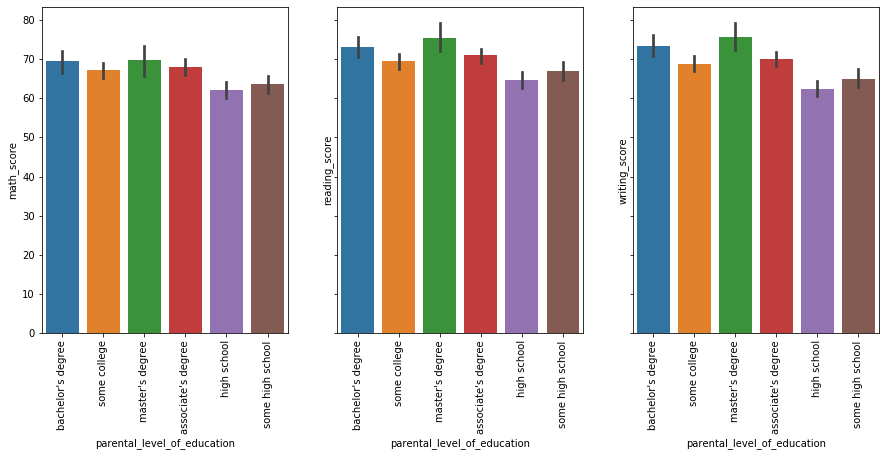

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
a1 = sns.barplot(x='parental_level_of_education',y='math_score',data=df, ax=axs[0])
a2 = sns.barplot(x='parental_level_of_education',y='reading_score',data=df, ax=axs[1])
a3 = sns.barplot(x='parental_level_of_education',y='writing_score',data=df, ax=axs[2])
a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
a2.set_xticklabels(a2.get_xticklabels(), rotation=90)
a3.set_xticklabels(a3.get_xticklabels(), rotation=90)

This can also be seen in the bar plot where the bars for these two groups are clearly lower than most for all scores.

#### Lunch

In [18]:
mod = ols("math_score ~ lunch", data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print()
print("Math Scores")
print(aov_table)

mod = ols("reading_score ~ lunch", data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print()
print("Reading Scores")
print(aov_table)

mod = ols("writing_score ~ lunch", data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print()
print("Writing Scores")
print(aov_table)


Math Scores
                 sum_sq     df           F        PR(>F)
lunch      28278.037838    1.0  140.118842  2.413196e-30
Residual  201411.041162  998.0         NaN           NaN

Reading Scores
                 sum_sq     df          F        PR(>F)
lunch      11222.155126    1.0  55.518242  2.002797e-13
Residual  201730.283874  998.0        NaN           NaN

Writing Scores
                 sum_sq     df          F        PR(>F)
lunch      13933.413119    1.0  64.156643  3.186190e-15
Residual  216743.670881  998.0        NaN           NaN


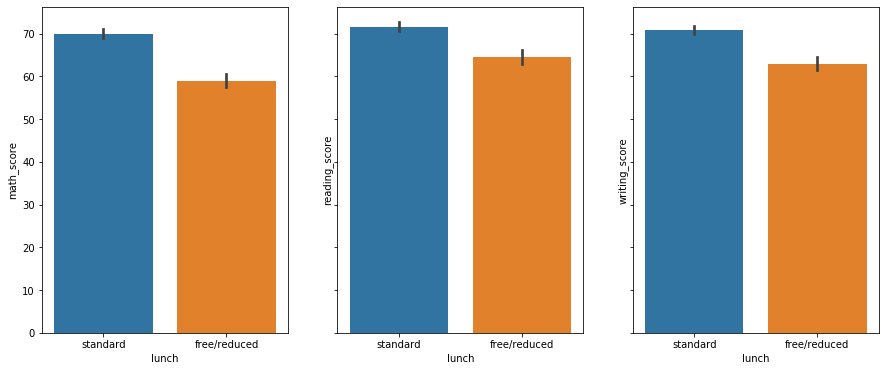

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
sns.barplot(x='lunch',y='math_score',data=df, ax=axs[0])
sns.barplot(x='lunch',y='reading_score',data=df, ax=axs[1])
sns.barplot(x='lunch',y='writing_score',data=df, ax=axs[2])

As it is possible to see, also when comparing lunch costs, the students with "free/reduced" cost performed worse than the others.

#### Test preparation course

In [20]:
mod = ols("math_score ~ test_preparation_course", data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print()
print("Math Scores")
print(aov_table)

mod = ols("reading_score ~ test_preparation_course", data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print()
print("Reading Scores")
print(aov_table)

mod = ols("writing_score ~ test_preparation_course", data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print()
print("Writing Scores")
print(aov_table)


Math Scores
                                sum_sq     df          F        PR(>F)
test_preparation_course    7253.160232    1.0  32.542648  1.535913e-08
Residual                 222435.918768  998.0        NaN           NaN

Reading Scores
                                sum_sq     df          F        PR(>F)
test_preparation_course   12448.726414    1.0  61.963087  9.081783e-15
Residual                 200503.712586  998.0        NaN           NaN

Writing Scores
                                sum_sq     df           F        PR(>F)
test_preparation_course   22591.447181    1.0  108.350892  3.685292e-24
Residual                 208085.636819  998.0         NaN           NaN


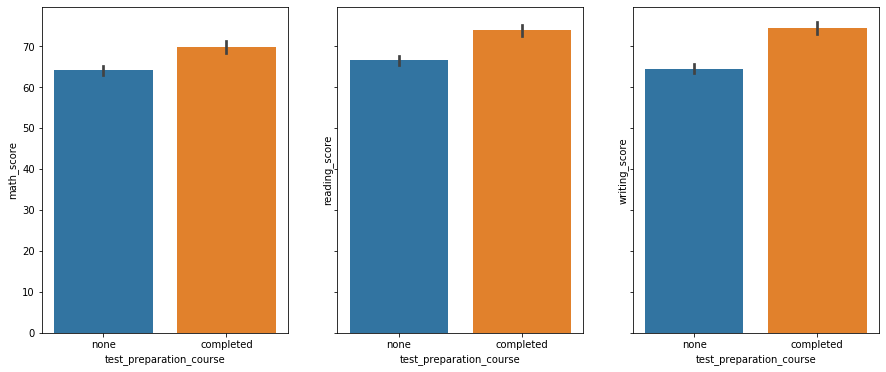

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
sns.barplot(x='test_preparation_course',y='math_score',data=df, ax=axs[0])
sns.barplot(x='test_preparation_course',y='reading_score',data=df, ax=axs[1])
sns.barplot(x='test_preparation_course',y='writing_score',data=df, ax=axs[2])

As it is possible to see, students whom completed the test preparation course also performed better in all the exams.